Import

In [444]:
import pandas as pd
import seaborn as sns
import missingno as msno
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score as evs
from sklearn.metrics import r2_score as r2
from sklearn.preprocessing import LabelEncoder
from scipy.stats import norm
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, mean_squared_error, mean_absolute_error

In [241]:
df = pd.read_csv("/content/drive/MyDrive/Bank_Project/IMDB_rating/movie_metadata.csv")

Explore and data cleaning

In [242]:
df.head()

color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  ...  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi  ...   
1                 40000.0  309404152.0         Action|Adventure|Fantasy  ...   
2                 11000.0  200074175.0        Action|Adventure|Thriller  ...   
3                 27000.0  448130642.0                  Action|Thriller  ...   
4                   131.0          NaN                      Documentary  ...   

  num_user_for_reviews language  country  content_rating       budget  \
0               3054.0  English      USA           PG-13  237000000.0   
1               1238.0  English      USA           PG-13  300000000.0   
2                994.0  English       UK           PG-13  245000000.0   
3               2701.0  English      USA           PG-13  250000000.0   
4                  NaN      NaN      NaN             NaN          NaN   

   title_year actor_2_facebook_likes imdb_score  aspect_ratio  \
0      2009.0                  936.0        7.9          1.78   
1      2007.0                 5000.0        7.1          2.35   
2      2015.0                  393.0        6.8          2.35   
3      2012.0                23000.0        8.5          2.35   
4         NaN                   12.0        7.1           NaN   

  movie_facebook_likes  
0                33000  
1                    0  
2                85000  
3               164000  
4                    0  

[5 rows x 28 columns]

In [243]:
df.describe()

num_critic_for_reviews     duration  director_facebook_likes  \
count             4993.000000  5028.000000              4939.000000   
mean               140.194272   107.201074               686.509212   
std                121.601675    25.197441              2813.328607   
min                  1.000000     7.000000                 0.000000   
25%                 50.000000    93.000000                 7.000000   
50%                110.000000   103.000000                49.000000   
75%                195.000000   118.000000               194.500000   
max                813.000000   511.000000             23000.000000   

       actor_3_facebook_likes  actor_1_facebook_likes         gross  \
count             5020.000000             5036.000000  4.159000e+03   
mean               645.009761             6560.047061  4.846841e+07   
std               1665.041728            15020.759120  6.845299e+07   
min                  0.000000                0.000000  1.620000e+02   
25%                133.000000              614.000000  5.340988e+06   
50%                371.500000              988.000000  2.551750e+07   
75%                636.000000            11000.000000  6.230944e+07   
max              23000.000000           640000.000000  7.605058e+08   

       num_voted_users  cast_total_facebook_likes  facenumber_in_poster  \
count     5.043000e+03                5043.000000           5030.000000   
mean      8.366816e+04                9699.063851              1.371173   
std       1.384853e+05               18163.799124              2.013576   
min       5.000000e+00                   0.000000              0.000000   
25%       8.593500e+03                1411.000000              0.000000   
50%       3.435900e+04                3090.000000              1.000000   
75%       9.630900e+04               13756.500000              2.000000   
max       1.689764e+06              656730.000000             43.000000   

       num_user_for_reviews        budget   title_year  \
count           5022.000000  4.551000e+03  4935.000000   
mean             272.770808  3.975262e+07  2002.470517   
std              377.982886  2.061149e+08    12.474599   
min                1.000000  2.180000e+02  1916.000000   
25%               65.000000  6.000000e+06  1999.000000   
50%              156.000000  2.000000e+07  2005.000000   
75%              326.000000  4.500000e+07  2011.000000   
max             5060.000000  1.221550e+10  2016.000000   

       actor_2_facebook_likes   imdb_score  aspect_ratio  movie_facebook_likes  
count             5030.000000  5043.000000   4714.000000           5043.000000  
mean              1651.754473     6.442138      2.220403           7525.964505  
std               4042.438863     1.125116      1.385113          19320.445110  
min                  0.000000     1.600000      1.180000              0.000000  
25%                281.000000     5.800000      1.850000              0.000000  
50%                595.000000     6.600000      2.350000            166.000000  
75%                918.000000     7.200000      2.350000           3000.000000  
max             137000.000000     9.500000     16.000000         349000.000000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f11c219f7d0>,
      dtype=object)

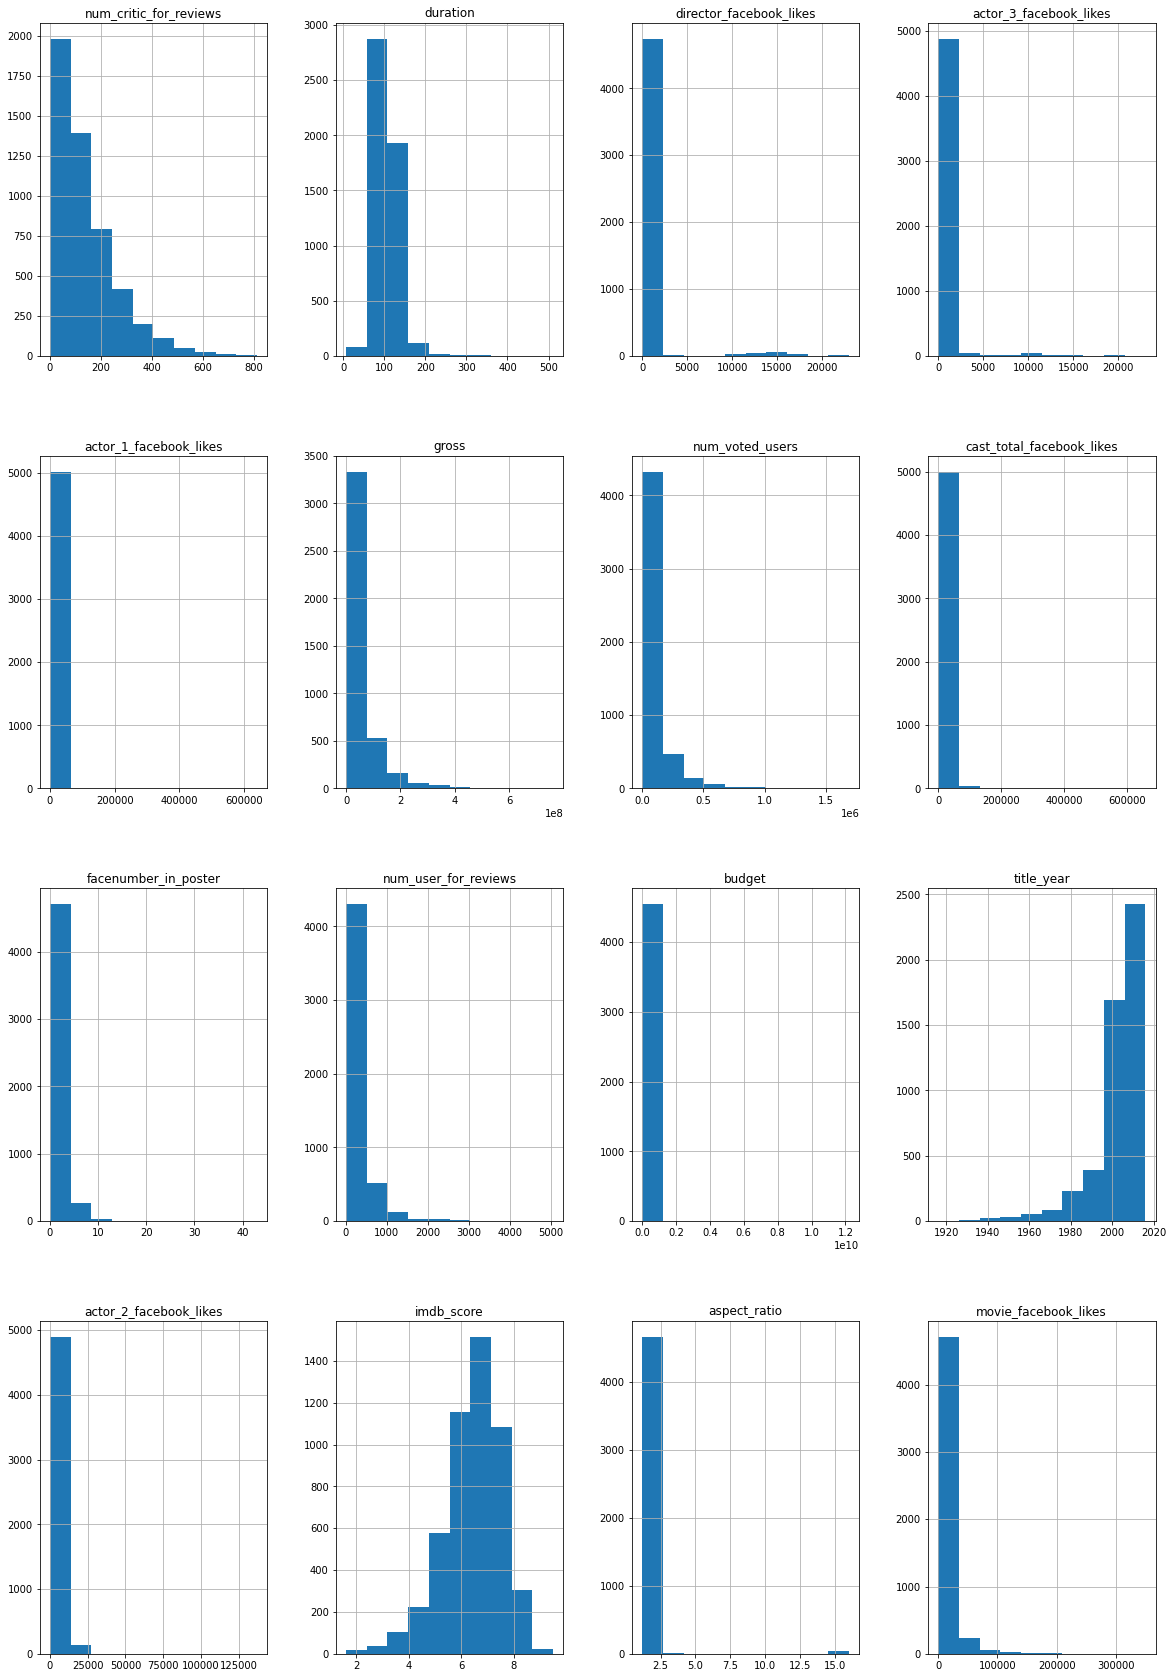

In [244]:
#plot the histogram to see the distribution of the data values for different features 
fig = plt.figure(figsize = (20,30))
ax = fig.gca()
df.hist(ax = ax)

We clearly see the huge variation in the data values,with outliers and zero values. We can work on it to improve the performance of the model.

In [245]:
#Taking care of outliers
num_cols = df.select_dtypes(exclude = object).columns
cols = num_cols

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 3.5 * IQR)) |(df[cols] > (Q3 + 3.5 * IQR))).any(axis=1)]

In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3512 entries, 4 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3496 non-null   object 
 1   director_name              3445 non-null   object 
 2   num_critic_for_reviews     3463 non-null   float64
 3   duration                   3500 non-null   float64
 4   director_facebook_likes    3445 non-null   float64
 5   actor_3_facebook_likes     3492 non-null   float64
 6   actor_2_name               3501 non-null   object 
 7   actor_1_facebook_likes     3505 non-null   float64
 8   gross                      2778 non-null   float64
 9   genres                     3512 non-null   object 
 10  actor_1_name               3505 non-null   object 
 11  movie_title                3512 non-null   object 
 12  num_voted_users            3512 non-null   int64  
 13  cast_total_facebook_likes  3512 non-null   int64

In [249]:
#drop duplicates rows 
df.drop_duplicates(inplace = True)

In [250]:
#missing values
df.isnull().sum()

color                         16
director_name                 66
num_critic_for_reviews        48
duration                      12
director_facebook_likes       66
actor_3_facebook_likes        20
actor_2_name                  11
actor_1_facebook_likes         7
gross                        724
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  20
facenumber_in_poster           8
plot_keywords                137
movie_imdb_link                0
num_user_for_reviews          21
language                       8
country                        4
content_rating               267
budget                       405
title_year                    70
actor_2_facebook_likes        11
imdb_score                     0
aspect_ratio                 314
movie_facebook_likes           0
dtype: int64

In [251]:
cols_object = df.select_dtypes(include = object).columns

In [252]:
def fill_mode(df, fill_mode_col):
    '''Fills the column from fill_mod_col with mode of respective columns''' 
    
    for col in fill_mode_col:
        df[col]=df[col].fillna(df[col].mode()[0])
    return df
fill_mode(df, cols_object)

color     director_name  num_critic_for_reviews  duration  \
4     Color       Doug Walker                     NaN       NaN   
59    Color      Brett Ratner                   162.0      91.0   
68    Color     Rob Letterman                   219.0      94.0   
72    Color         Rob Cohen                   264.0     112.0   
76    Color    Kevin Reynolds                    91.0     176.0   
...     ...               ...                     ...       ...   
5037  Color      Edward Burns                    14.0      95.0   
5038  Color       Scott Smith                     1.0      87.0   
5040  Color  Benjamin Roberds                    13.0      76.0   
5041  Color       Daniel Hsia                    14.0     100.0   
5042  Color          Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes        actor_2_name  \
4                       131.0                     NaN          Rob Walker   
59                      420.0                   173.0           Dana Ivey   
68                       11.0                   459.0        Rainn Wilson   
72                      357.0                   595.0      Brendan Fraser   
76                       58.0                    60.0         Rick Aviles   
...                       ...                     ...                 ...   
5037                      0.0                   133.0  Caitlin FitzGerald   
5038                      2.0                   318.0       Daphne Zuniga   
5040                      0.0                     0.0       Maxwell Moody   
5041                      0.0                   489.0       Daniel Henney   
5042                     16.0                    16.0    Brian Herzlinger   

      actor_1_facebook_likes        gross  \
4                      131.0          NaN   
59                     268.0  140080850.0   
68                    1000.0  198332128.0   
72                    5000.0  102176165.0   
76                     711.0   88246220.0   
...                      ...          ...   
5037                   296.0       4584.0   
5038                   637.0          NaN   
5040                     0.0          NaN   
5041                   946.0      10443.0   
5042                    86.0      85222.0   

                                               genres  ...  \
4                                         Documentary  ...   
59                       Action|Comedy|Crime|Thriller  ...   
68    Action|Adventure|Animation|Comedy|Family|Sci-Fi  ...   
72           Action|Adventure|Fantasy|Horror|Thriller  ...   
76                   Action|Adventure|Sci-Fi|Thriller  ...   
...                                               ...  ...   
5037                                     Comedy|Drama  ...   
5038                                     Comedy|Drama  ...   
5040                            Drama|Horror|Thriller  ...   
5041                             Comedy|Drama|Romance  ...   
5042                                      Documentary  ...   

     num_user_for_reviews language  country  content_rating       budget  \
4                     NaN  English      USA               R          NaN   
59                  221.0  English      USA           PG-13  140000000.0   
68                  187.0  English      USA              PG  175000000.0   
72                  501.0  English      USA           PG-13  145000000.0   
76                  309.0  English      USA           PG-13  175000000.0   
...                   ...      ...      ...             ...          ...   
5037                 14.0  English      USA       Not Rated       9000.0   
5038                  6.0  English   Canada               R          NaN   
5040                  3.0  English      USA               R       1400.0   
5041                  9.0  English      USA           PG-13          NaN   
5042                 84.0  English      USA              PG       1100.0   

      title_year actor_2_facebook_likes imdb_score  aspect_ratio  \
4        

In [254]:
#Fill the missing categorical columns with the mode 
cols_num = df.select_dtypes(exclude = object).columns
for x in cols_num:
  df[x] = df[x].fillna(df.groupby(['genres', 'language','country'])[x].transform('mean'))

In [255]:
#missing value
df.isnull().sum()

color                          0
director_name                  0
num_critic_for_reviews        10
duration                       7
director_facebook_likes       22
actor_3_facebook_likes        12
actor_2_name                   0
actor_1_facebook_likes         4
gross                        294
genres                         0
actor_1_name                   0
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                   0
facenumber_in_poster           2
plot_keywords                  0
movie_imdb_link                0
num_user_for_reviews           7
language                       0
country                        0
content_rating                 0
budget                       144
title_year                    23
actor_2_facebook_likes         7
imdb_score                     0
aspect_ratio                 110
movie_facebook_likes           0
dtype: int64

In [256]:
#Finally drop the remaining missing rows
df.dropna(inplace = True)

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3086 entries, 4 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3086 non-null   object 
 1   director_name              3086 non-null   object 
 2   num_critic_for_reviews     3086 non-null   float64
 3   duration                   3086 non-null   float64
 4   director_facebook_likes    3086 non-null   float64
 5   actor_3_facebook_likes     3086 non-null   float64
 6   actor_2_name               3086 non-null   object 
 7   actor_1_facebook_likes     3086 non-null   float64
 8   gross                      3086 non-null   float64
 9   genres                     3086 non-null   object 
 10  actor_1_name               3086 non-null   object 
 11  movie_title                3086 non-null   object 
 12  num_voted_users            3086 non-null   int64  
 13  cast_total_facebook_likes  3086 non-null   int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f11c21f5d10>,
      dtype=object)

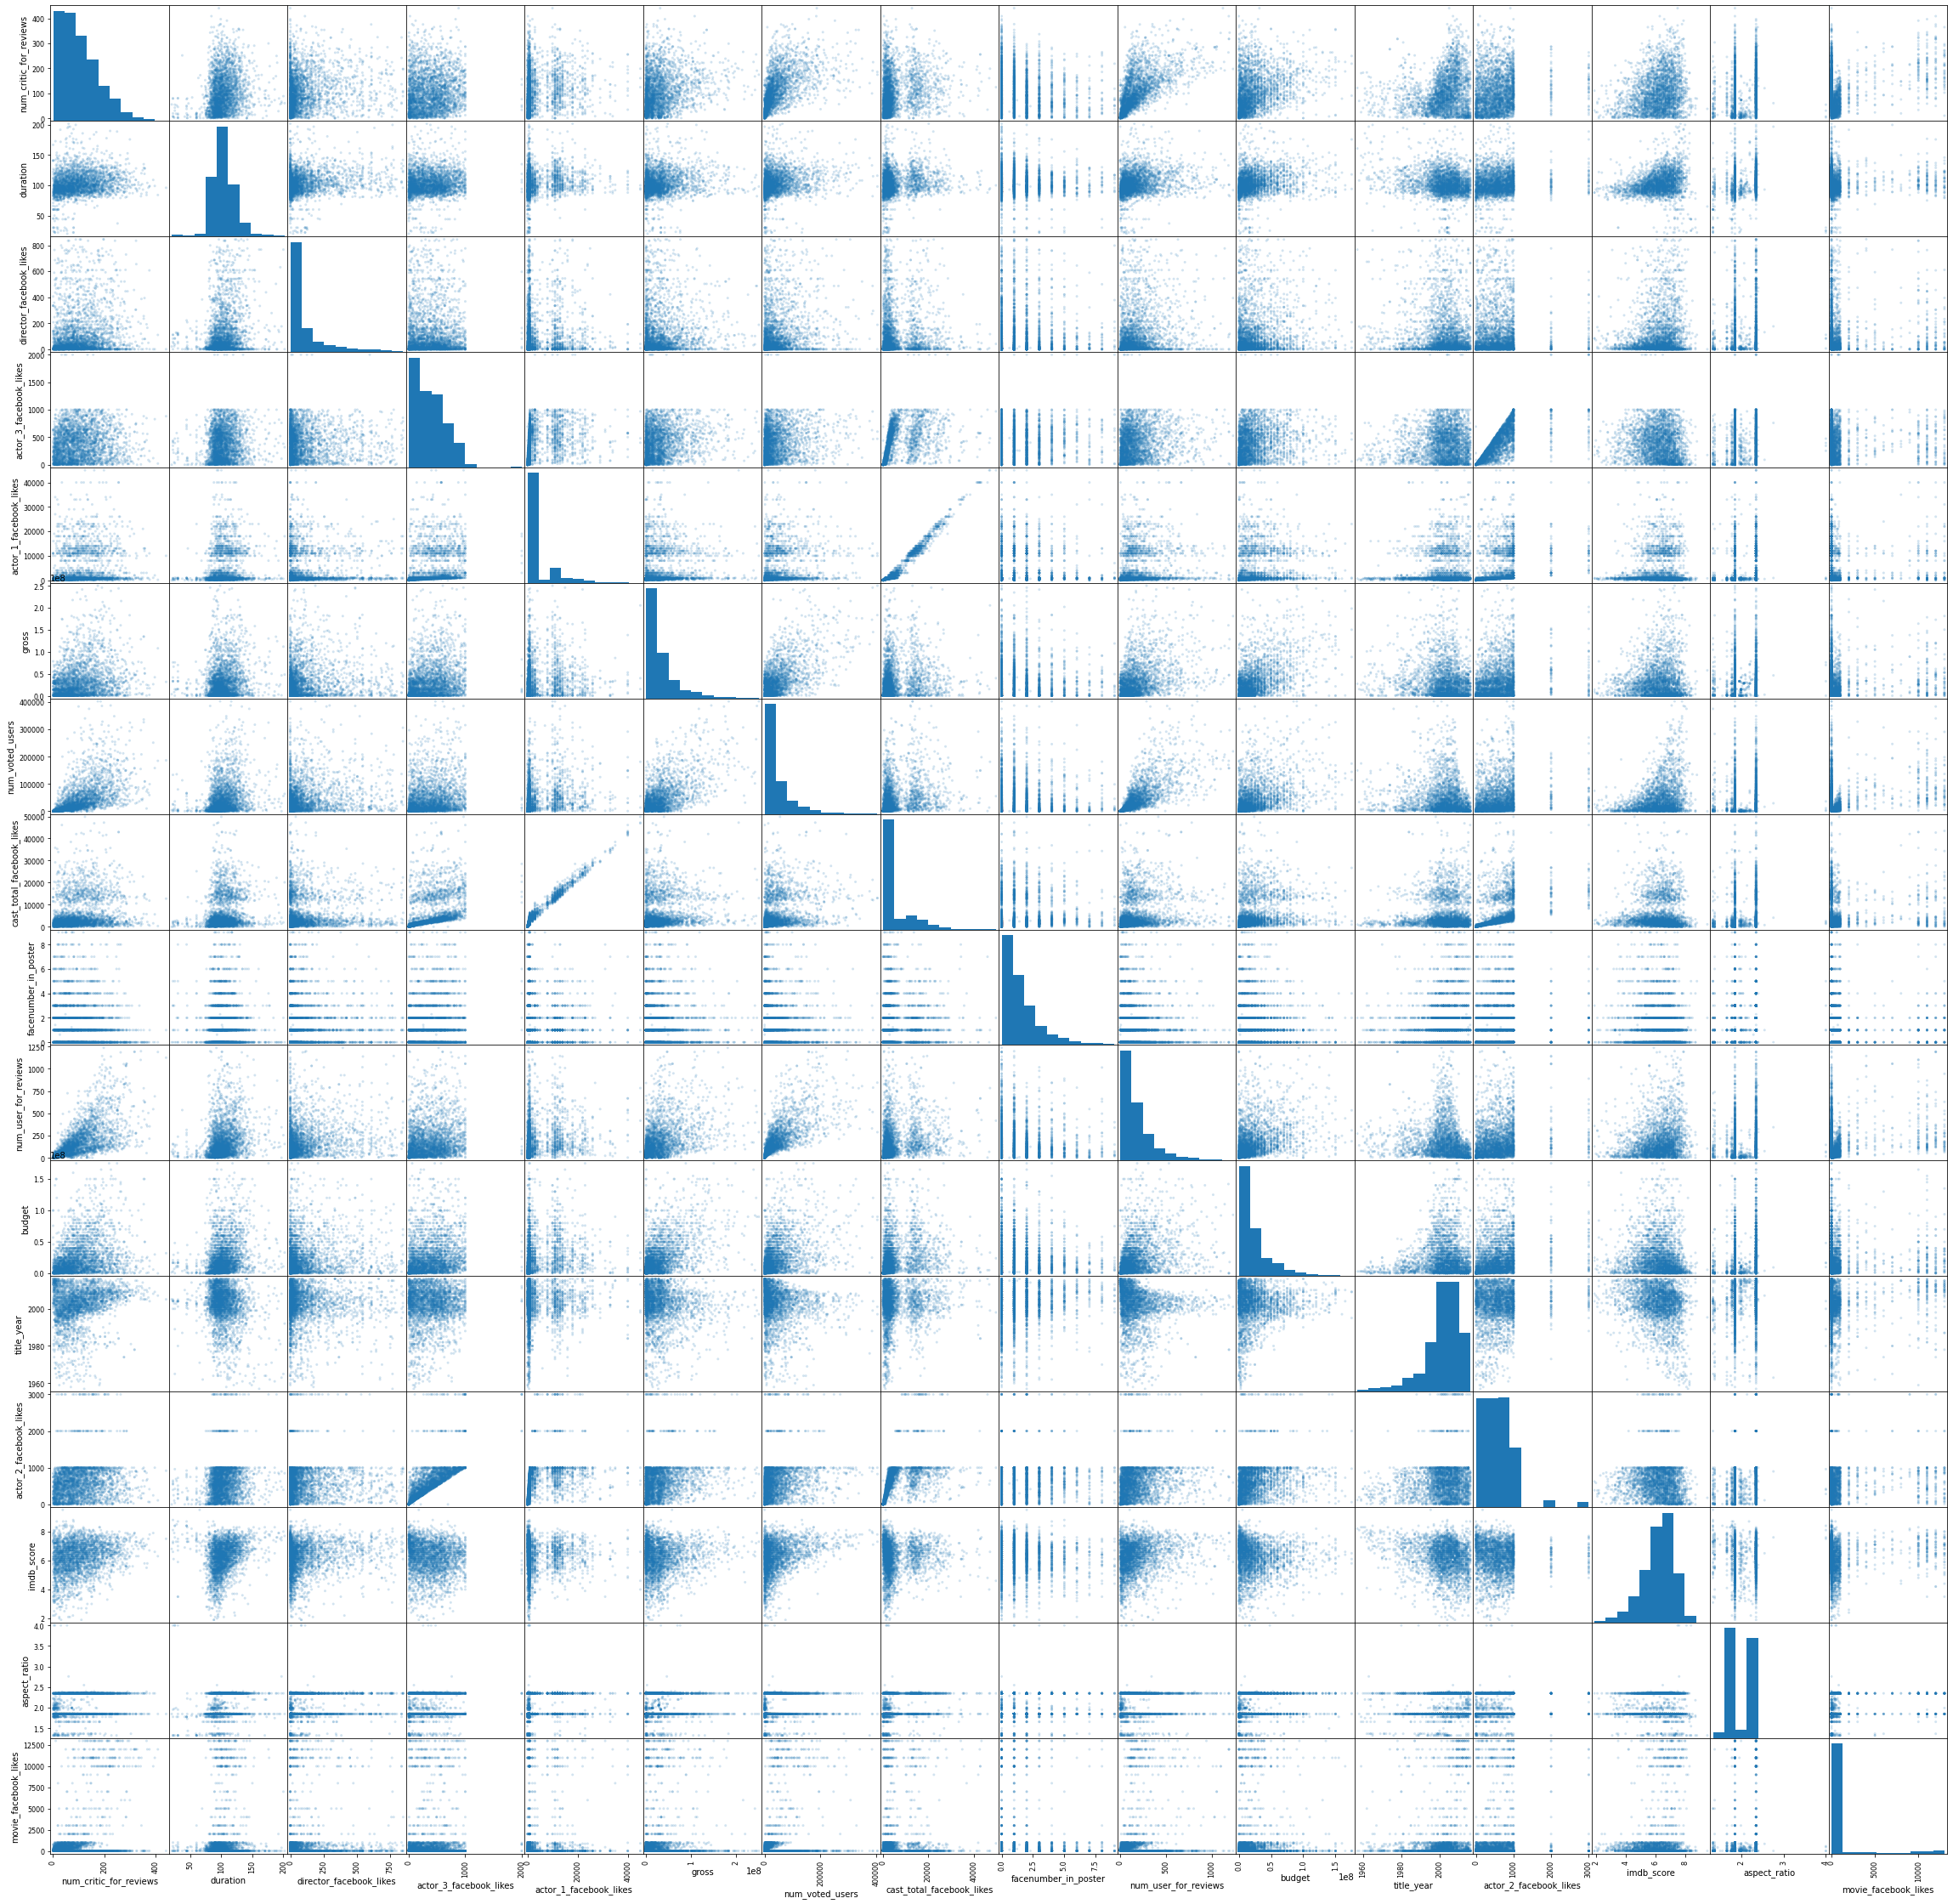

In [258]:
 #scatter plot to visualize the distribution of one feature over other. 
 pd.plotting.scatter_matrix(df, alpha=0.2, figsize = (40,40))

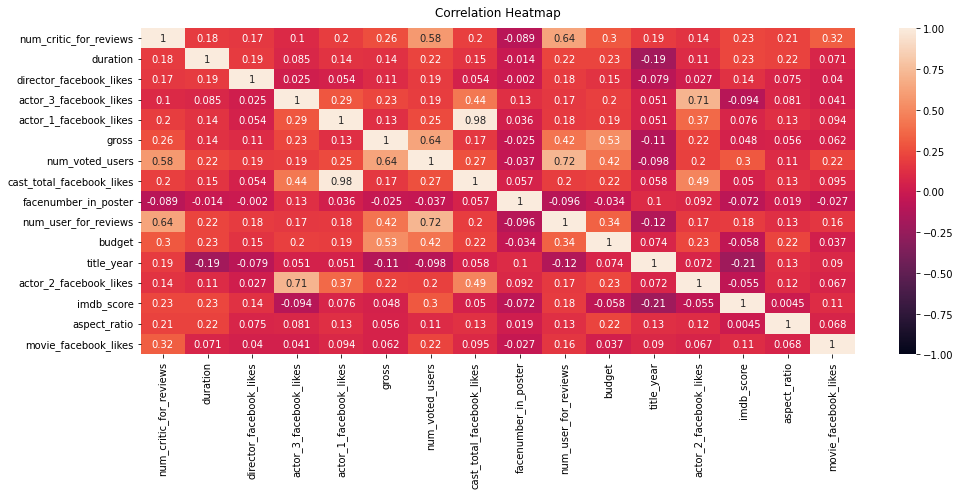

In [263]:
#Obtain the heatmap showing the pearson corelation different features
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

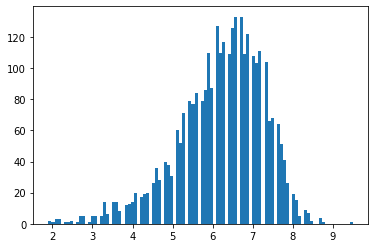

In [266]:
#Visualize the histogram of Target Variable after the data cleaning
plt.hist(df['imdb_score'], bins=100);

Try the Neural Network model using Keras

In [466]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

transformer = make_column_transformer(
    (MinMaxScaler(), 
        ['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year',
       'actor_2_facebook_likes', 'aspect_ratio',
       'movie_facebook_likes']),
    (OneHotEncoder(handle_unknown='ignore'), 
        ['color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name',
       'movie_title', 'actor_3_name', 'plot_keywords', 'movie_imdb_link',
       'language', 'country', 'content_rating'])
)

In [467]:
from sklearn.model_selection import train_test_split

X = df.drop('imdb_score', axis=1)
y = df['imdb_score']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [463]:
results

array([-1.25657284, -0.64888448, -0.82971519, -0.967251  , -1.40806651])

In [468]:
# Fit
transformer.fit(X_train)

# Apply the transformation
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

In [469]:
X_train_arr = X_train.toarray()
X_test_arr = X_test.toarray()

In [472]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

In [471]:
#def rmse(y_true, y_pred):
    #return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [473]:
X_train_arr.shape

(2468, 14583)

In [477]:
tf.random.set_seed(42)

model = Sequential([
    Dense(1000, activation='relu'),
    Dense(500, activation='relu'),
    Dense(250, activation='relu'),
    Dense(50, activation='relu'),
    Dense(1)
])

model.compile(
    loss=rmse,
    optimizer=Adam(),
    metrics=[rmse]
)

model.fit(X_train_arr, y_train, epochs=10)

Epoch 1/10
78/78 [==============================] - 11s 120ms/step - loss: 1.6249 - rmse: 1.6126
Epoch 2/10
78/78 [==============================] - 7s 91ms/step - loss: 1.0848 - rmse: 1.0792
Epoch 3/10
78/78 [==============================] - 7s 92ms/step - loss: 0.7701 - rmse: 0.7784
Epoch 4/10
78/78 [==============================] - 7s 91ms/step - loss: 0.5424 - rmse: 0.5400
Epoch 5/10
78/78 [==============================] - 7s 91ms/step - loss: 0.4614 - rmse: 0.4612
Epoch 6/10
78/78 [==============================] - 7s 92ms/step - loss: 0.4660 - rmse: 0.4635
Epoch 7/10
78/78 [==============================] - 7s 92ms/step - loss: 0.4331 - rmse: 0.4345
Epoch 8/10
78/78 [==============================] - 7s 91ms/step - loss: 0.4273 - rmse: 0.4263
Epoch 9/10
78/78 [==============================] - 7s 92ms/step - loss: 0.3637 - rmse: 0.3641
Epoch 10/10
78/78 [==============================] - 7s 91ms/step - loss: 0.3259 - rmse: 0.3258


In [478]:
pred = model.predict(X_test_arr)
r2(y_test,pred)

0.2345830985712246

Try different Regression model without neural network.

In [363]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score as evs
from sklearn.metrics import r2_score as r2
from sklearn.preprocessing import LabelEncoder
from scipy.stats import norm
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
Preprocessing and Modeling

In [481]:
#Label Encoding
non_num = df.select_dtypes(include=['object']).columns
for c in non_num:
    lbl = LabelEncoder() 
    lbl.fit(list(df[c].values)) 
    df[c] = lbl.transform(list(df[c].values))

In [482]:
from sklearn.model_selection import train_test_split

X = df.drop('imdb_score', axis=1)
y = df['imdb_score']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [486]:
#Random Forest
sc = StandardScaler()
X_train_norm = sc.fit_transform(X_train)
X_test_norm = sc.transform(X_test)
rf_reg.fit(X_train_norm, y_train)
y_pred = rf_reg.predict(X_test_norm)
print(f'r2_score {r2(y_test, y_pred)}')

r_square 0.4340506465862132


In [485]:
#Linear Regression Model
ols = LinearRegression()
ols.fit(X_train_norm, y_train)
ols_pred = ols.predict(X_test_norm)
#mean square error
np.sqrt(mean_squared_error(y_test, ols_pred)),r2(y_test, ols_pred)

(0.8509362409577885, 0.28493235855467114)

In [404]:
#XGboost model
xgb_m = xgb.XGBRegressor()
xgb_m.fit(X_train_norm, y_train) 
xgb_pred = xgb_m.predict(X_test_norm)

[20:16:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [409]:
np.sqrt(mean_squared_error(y_test, xgb_pred)),r2(y_test,xgb_pred)

(0.7188807619305576, 0.4896515409187757)

In [426]:
#Save the features and label data into external file for building a model
X.to_csv('X.csv')
y.to_csv('y.csv')

In [488]:
# Save best performing Model Using Pickle
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = pd.read_csv('X.csv', index_col = 0)
y = pd.read_csv('y.csv', index_col = 0)
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# Fit the model on training set
sc = StandardScaler()
X_train_norm = sc.fit_transform(X_train)
X_test_norm = sc.transform(X_test)
xgb_m = xgb.XGBRegressor()
xgb_m.fit(X_train_norm,Y_train)

# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(xgb_m, open(filename, 'wb'))
 
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test_norm, Y_test)
print(result)

[23:04:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:04:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.49207974979401803
